In [1]:
%load_ext autoreload
%autoreload 2

# Visualize

In [2]:
import os
os.chdir('/home/stud/ath/ath_ws/keypoint_dataset_pipeline')
from config import config
import cv2
import numpy as np

In [3]:
from src import Painter
painter = Painter()

In [4]:
names = painter.data_store.get_random_pair()
name_a, name_b = names.split('_')

name_a, name_b = '12304302998190', '12304369577190'
name_a, name_b

('12304302998190', '12304369577190')

In [5]:
# name_a = config.samples[config.task.name].reference
# name_b = config.samples[config.task.name].target
# 
# name_a, name_b

# Keypoints

In [6]:
# painter.show_keypoints(name_a, filtered=False)

In [7]:
# painter.show_keypoints(name_a, filtered=True)

# Matches

In [8]:
# painter.show_matches(name_a, name_b) 

# Filtered Matches

INFO     | show_filtered_matches | Number of Matches 33


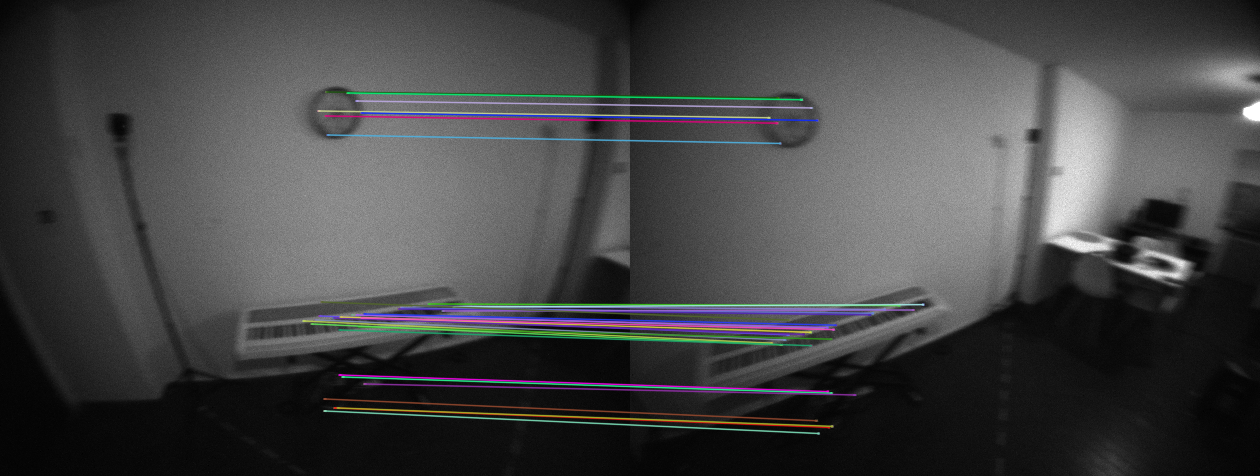

In [9]:
painter.show_filtered_matches(name_a, name_b)

original_w, original_h (640, 480)
crop_w, crop_h (630, 476)
left_padding, top_padding (5.0, 2.0)
INFO     | show_matches_on_original_image | Number of Matches 33


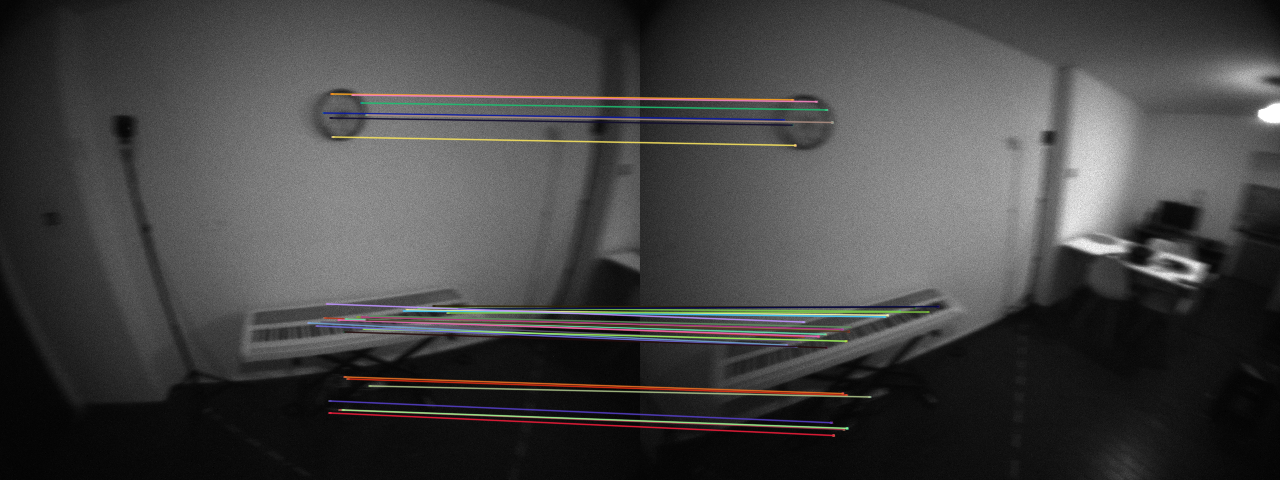

In [10]:
painter.show_matches_on_original_image(name_a, name_b)

# Rotations

In [11]:
from src import rotate

In [24]:
# index = 10
# ("images/MO09_8933920787390.png", "images/MO09_8934087213590.png", 
# np.array([280.5 + 5, 185.5 + 2]), np.array([264.417 + 5, 206.523 + 2])),

index = 12


INFO     | show_one_match | Number of Matches 33


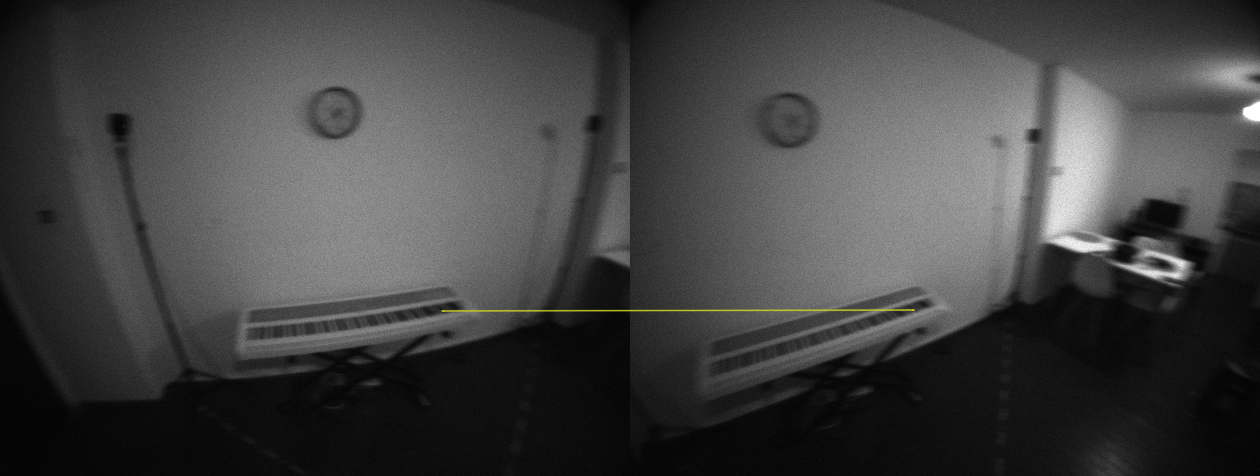

In [25]:
image_vis, image_a, image_b, image_a_coord, image_b_coord = painter.show_one_match(name_a, name_b, index=index)
image_vis

In [26]:
# im = cv2.drawKeypoints(np.array(image_a), [image_a_coord], None)
# painter._to_image(im)

In [27]:
# im = cv2.drawKeypoints(np.array(image_b), [image_b_coord], None)
# painter._to_image(im)

In [28]:
def crop_patch(image, x, y, size=32):
    # Calculate the box (left, upper, right, lower) for cropping
    left = max(x - size / 2, 0)
    upper = max(y - size / 2, 0)
    right = min(x + size / 2, image.width)
    lower = min(y + size / 2, image.height)
    
    # Crop and return the patch
    patch = image.crop((left, upper, right, lower))
    
    local_x = x - left
    local_y = y - upper
    
    return patch, local_x, local_y

In [29]:
bw_image_a, a_x, a_y = crop_patch(image_a, image_a_coord.pt[0], image_a_coord.pt[1])
bw_image_a = bw_image_a.convert("L")

bw_image_b, b_x, b_y = crop_patch(image_b, image_b_coord.pt[0], image_b_coord.pt[1])
bw_image_b = bw_image_b.convert("L")

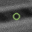

In [30]:
painter._to_image(
    cv2.drawKeypoints(
        np.array(bw_image_a), 
        [cv2.KeyPoint(a_x, a_y, 1.)], 
        None
    )
)

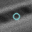

In [31]:
painter._to_image(
    cv2.drawKeypoints(
        np.array(bw_image_b), 
        [cv2.KeyPoint(b_x, b_y, 1.)], 
        None
    )
)

In [32]:
print(image_a_coord.pt, image_b_coord.pt)
print([a_x, a_y], [b_x, b_y])

# angle = rotate.solve_patch_rotation(
#     bw_image_a, 
#     bw_image_b, 
#     [a_x, a_y],
#     [b_x, b_y],
# )

# print(angle)
# # print(angle * (180 / np.pi))
# print(np.degrees(angle))

(442.5, 310.5) (282.8148193359375, 309.5086364746094)
[16.0, 16.0] [16.0, 16.0]


In [33]:
angle = rotate.solve_patch_rotation(
    image_a, 
    image_b, 
    [image_a_coord.pt[0], image_a_coord.pt[1]],
    [image_b_coord.pt[0], image_b_coord.pt[1]],
)

print(angle)
print(np.degrees(angle))

-0.18377004380330275
-10.529247910863514


In [34]:
old_angles = painter.data_store.rotations[names][()]
print(old_angles.shape)
print(old_angles[index])
# print(old_angles[index] * (180 / np.pi))
print(np.degrees(old_angles[index]))

(33,)
-0.07875859020141585
-4.512534818941528


In [35]:
# painter.data_store.close()